In [1]:
from fastai.vision.all import *
import timm

/home/swapdxd/miniconda3/envs/sihenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#define path of the training set 
path = Path("../data/kaggle_breed")

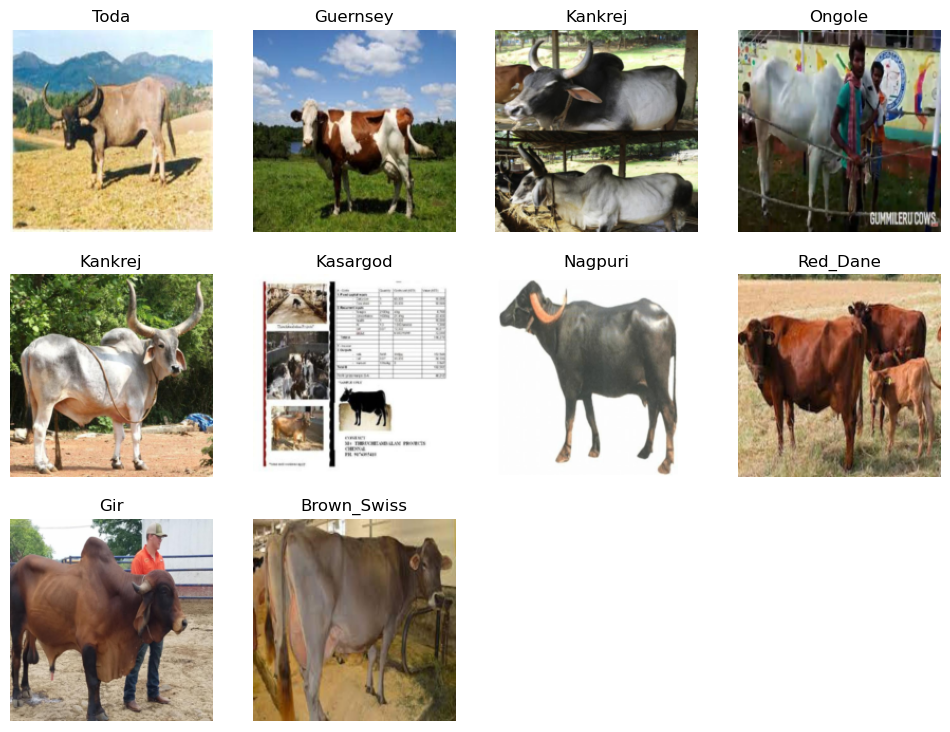

In [3]:
#Creating a Datablock 
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = GrandparentSplitter(train_name = "train", valid_name = "valid"),
    get_y = parent_label,
    item_tfms = [Resize(192, method="squish")]
).dataloaders(path,bs=32)

dls.show_batch(max_n=10)

In [4]:
#Checking all the lightweight Models

timm.list_models("*mobile*")
timm.list_models("*tinynet*")
timm.list_models("*lite*")


['coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'efficientnet_lite0',
 'efficientnet_lite1',
 'efficientnet_lite2',
 'efficientnet_lite3',
 'efficientnet_lite4',
 'tf_efficientnet_lite0',
 'tf_efficientnet_lite1',
 'tf_efficientnet_lite2',
 'tf_efficientnet_lite3',
 'tf_efficientnet_lite4']

In [5]:
#define the model Architecturre
#arch = timm.create_model("efficientnet_lite0", pretrained=True,num_classes=dls.c)

learn = vision_learner(dls, 'resnet18', metrics=accuracy, pretrained=True)
learn.fine_tune(10)


epoch,train_loss,valid_loss,accuracy,time
0,2.918239,2.252622,0.378840,00:17


epoch,train_loss,valid_loss,accuracy,time
0,2.108816,2.003249,0.438567,00:24
1,1.897921,1.934596,0.448805,00:24
2,1.694797,1.877790,0.479522,00:24
3,1.542866,1.879386,0.498294,00:24
4,1.341506,1.813877,0.486348,00:24
5,1.174091,1.797706,0.500000,00:24
6,1.036484,1.811064,0.532423,00:24
7,0.981039,1.779868,0.510239,00:25
8,0.850350,1.794724,0.518771,00:24
9,0.844084,1.772073,0.520478,00:24
